# Loan predictions

## Goal

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

Note: After speaking to Soccoro, ApplicantIncome and CoapplicantIncome are monthly incomes.

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

Some of my hypotheses:

1. Male applicants might be more likely to receive a loan.
2. Self-employed applicants might be more likely to receive a loan.

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("classification_exercise.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [3]:
print(df.shape)

(614, 13)


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# First, we will check if there are any duplicate Loan Id's.

idsUnique = len(set(df.Loan_ID))
idsTotal = df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [6]:
# Since there are no duplicates, we will drop the Loan_ID column.

df.drop(['Loan_ID'], axis=1, inplace=True)

In [7]:
print(df.shape)

(614, 12)


In [8]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
df.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [13]:
num_feats = df.dtypes[df.dtypes != 'object'].index.tolist()

In [14]:
num_feats

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
df["ApplicantIncome"].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [17]:
df["CoapplicantIncome"].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [18]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [19]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

1. How many applicants have a `Credit_History`. (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with expectation? And `CoapplicantIncome`?
3. Tipp: Possible skew in the data can be seen by comparing the mean to the median, i.e. the 50% figure of a feature.



1) From above, 475 applicants have a credit history.

Now, we will attempt to answer Question 2.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

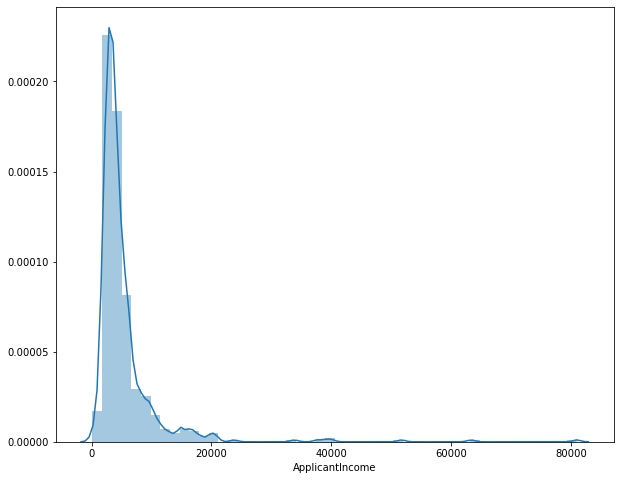

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'])

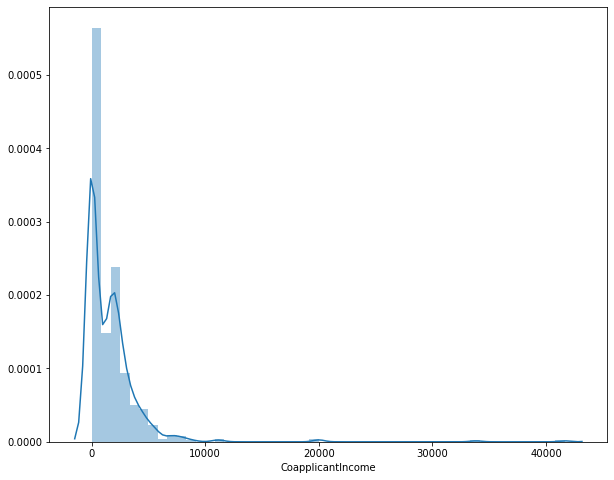

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['CoapplicantIncome'])

2) The ApplicantIncome distribution is not in line with expectation because 
it has a right skew.  The CoapplicantIncome distribution is not in line with 
expectation because it is a bimodal distribution (It has 2 peaks.).

Moving to nominal (categorical) variable. Look at the number of unique values in each of them.

In [24]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [25]:
df[cat_feats].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reason

In [26]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [30]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [31]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [32]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



First, we will plot the histogram of ApplicantIncome with different numbers of bins.

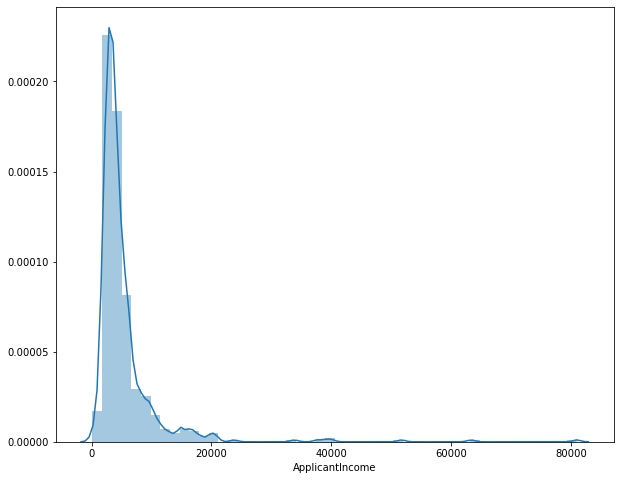

In [33]:
# Default number of bins.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'])

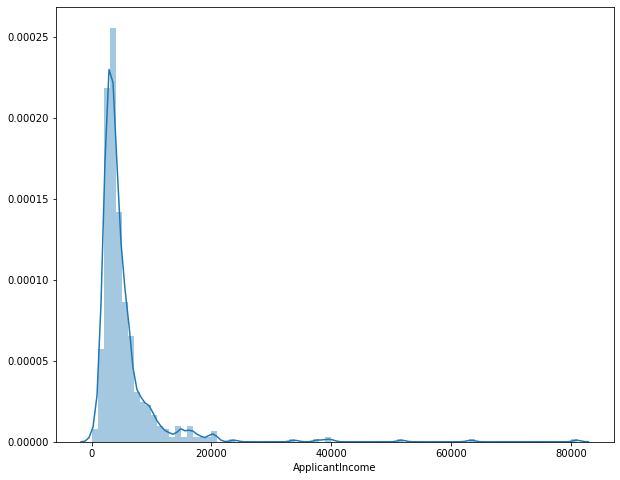

In [34]:
# Here, the width of each bin is 1000 starting at 0 and ending at 81000.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'], bins=list(range(0, 81001, 1000)))

In [35]:
quartile_list = [0, .25, .5, .75, 1.]
quartiles = df['ApplicantIncome'].quantile(quartile_list).to_list()
quartiles

[150.0, 2877.5, 3812.5, 5795.0, 81000.0]

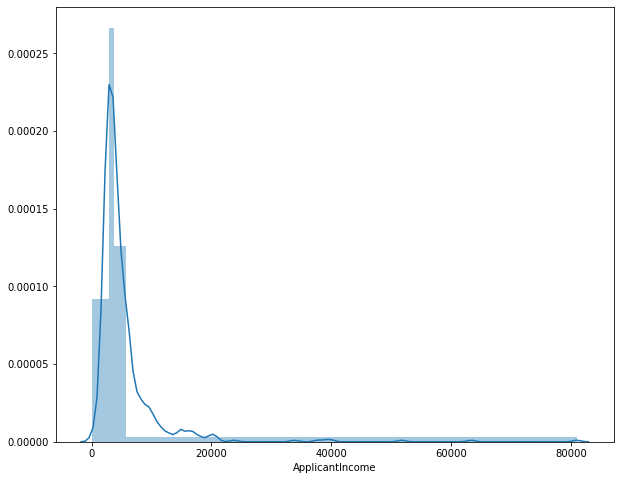

In [36]:
# Here, the bin edges are the quartiles.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'], bins=quartiles)

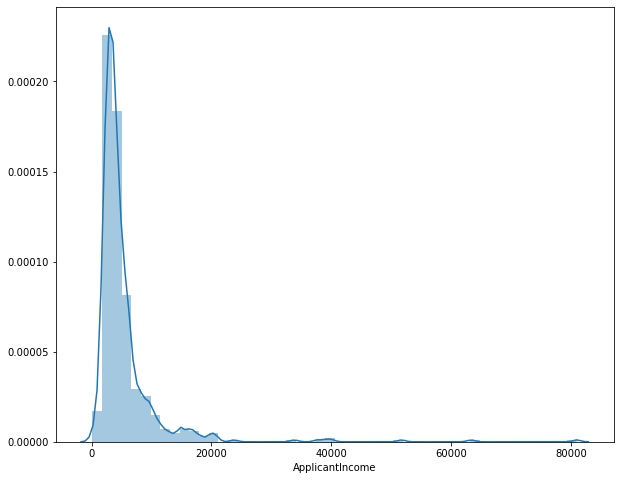

In [37]:
# Here, the number of bins is 50.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'], bins=50)

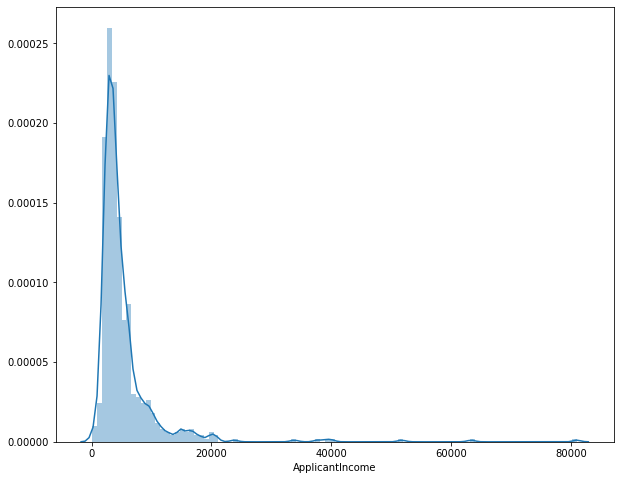

In [38]:
# Here, the number of bins is 100.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'], bins=100)

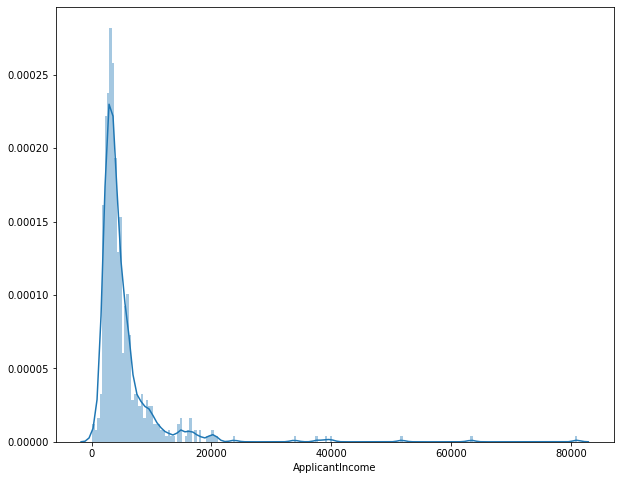

In [39]:
# Here, the number of bins is 200.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'], bins=200)

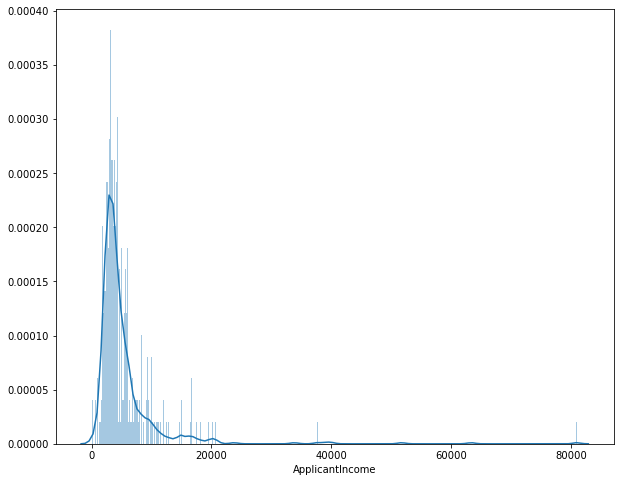

In [40]:
# Here, the number of bins is 1000.

f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['ApplicantIncome'], bins=1000)

Now, we will plot the histograms of the other numeric variables.

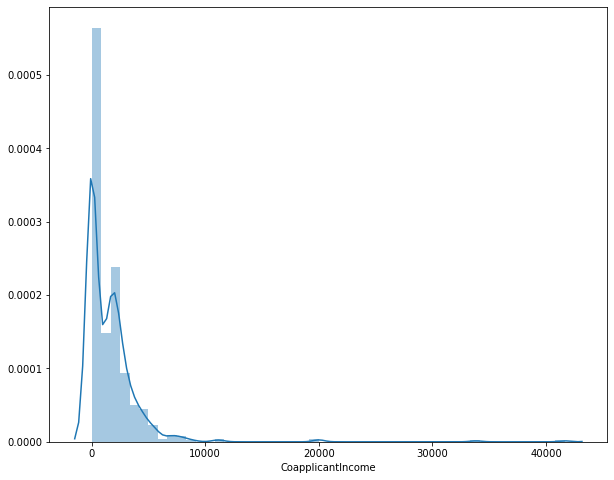

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['CoapplicantIncome'])

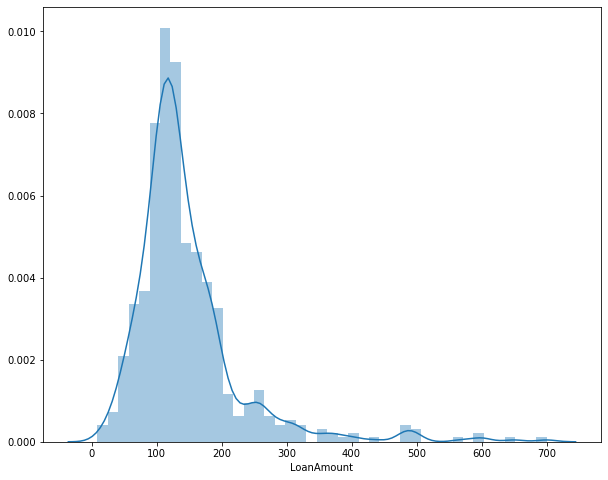

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['LoanAmount'])

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


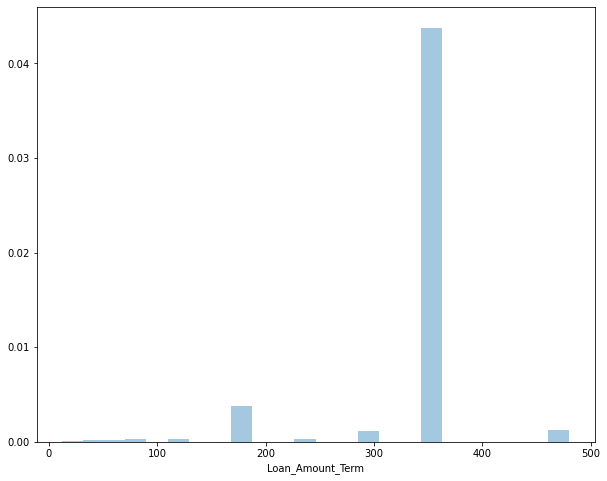

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['Loan_Amount_Term'])

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


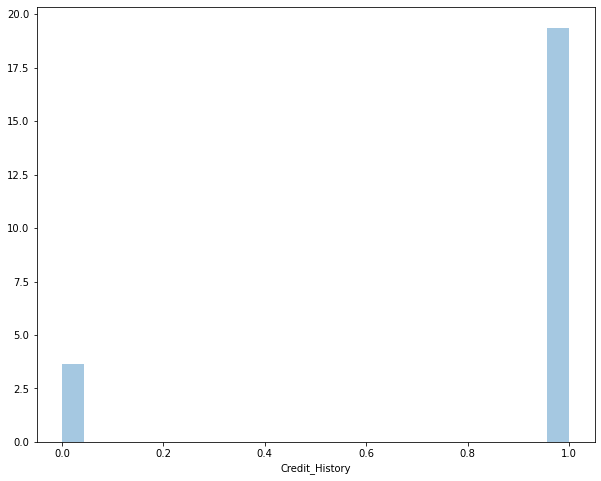

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['Credit_History'])


Look at box plots to understand the distributions. 

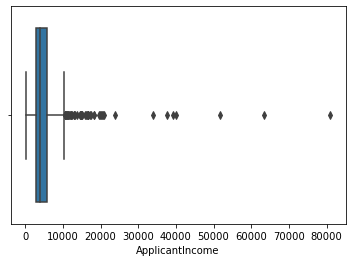

In [45]:
sns.boxplot(x=df['ApplicantIncome'])

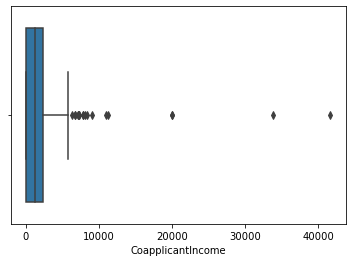

In [46]:
sns.boxplot(x=df['CoapplicantIncome'])

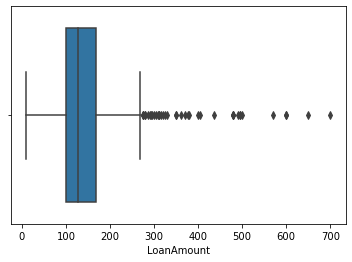

In [47]:
sns.boxplot(x=df['LoanAmount'])

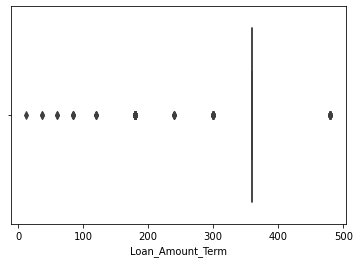

In [48]:
sns.boxplot(x=df['Loan_Amount_Term'])

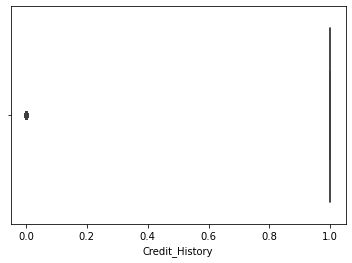

In [49]:
sns.boxplot(x=df['Credit_History'])

Now, we will continue with mutivariate analysis.

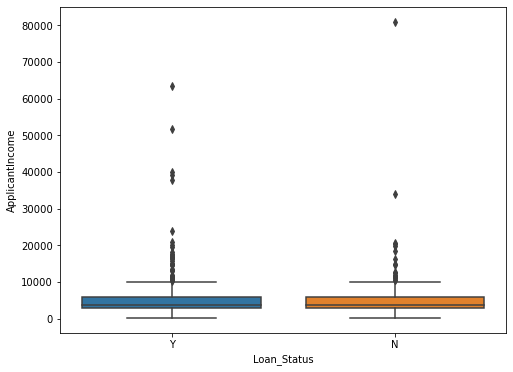

In [50]:
# ApplicantIncome

var = 'ApplicantIncome'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Loan_Status'], y=var, data=df[['Loan_Status', var]])


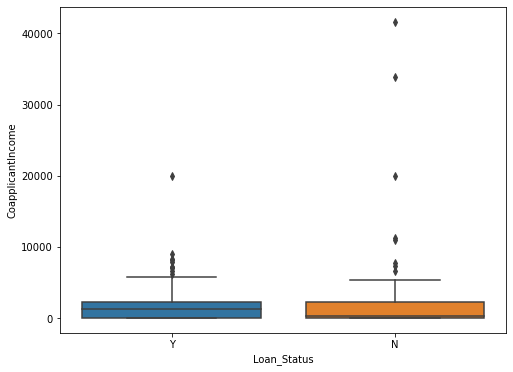

In [51]:
# CoapplicantIncome

var = 'CoapplicantIncome'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Loan_Status'], y=var, data=df[['Loan_Status', var]])


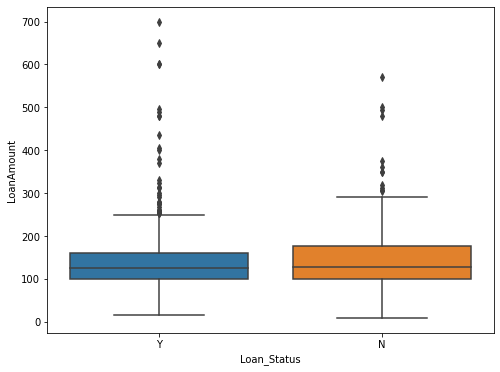

In [52]:
# LoanAmount

var = 'LoanAmount'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Loan_Status'], y=var, data=df[['Loan_Status', var]])


Look at the distribution of income segregated  by `Education`

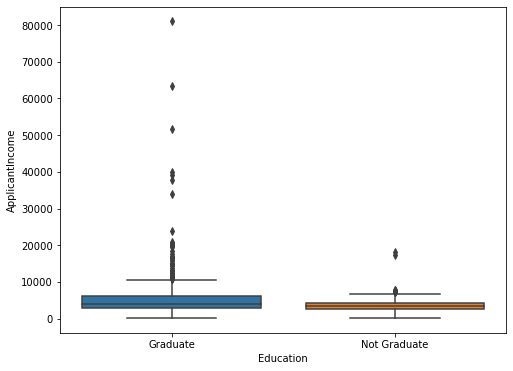

In [53]:
# Distribution of ApplicantIncome segregated by Education

var = 'ApplicantIncome'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Education'], y=var, data=df[['Education', var]])

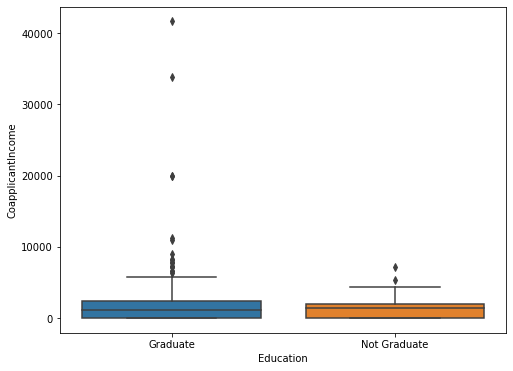

In [54]:
# Distribution of CoapplicantIncome segregated by Education

var = 'CoapplicantIncome'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Education'], y=var, data=df[['Education', var]])

Look at the histogram and boxplot of LoanAmount

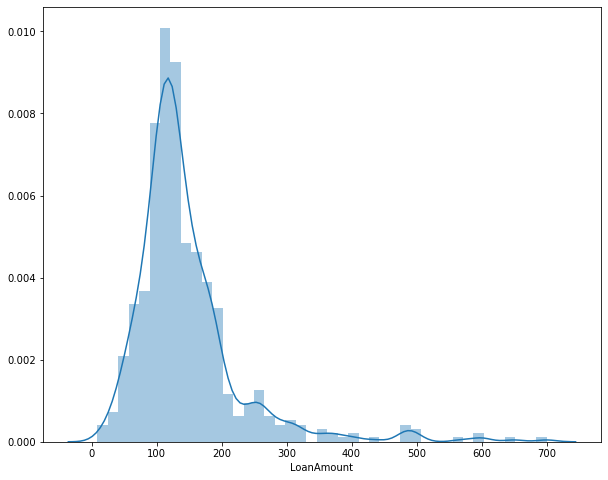

In [55]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['LoanAmount'])

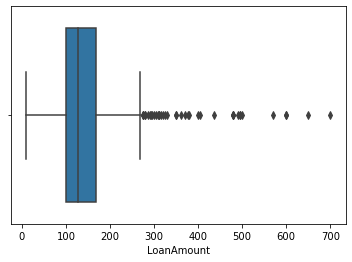

In [56]:
sns.boxplot(x=df['LoanAmount'])

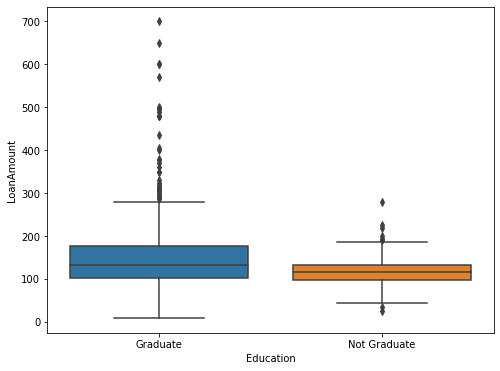

In [57]:
# Distribution of LoanAmount segregated by Education

var = 'LoanAmount'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Education'], y=var, data=df[['Education', var]])

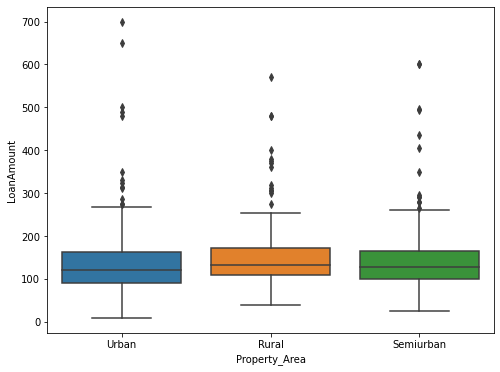

In [58]:
# Distribution of LoanAmount segregated by Property_Area

var = 'LoanAmount'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Property_Area'], y=var, data=df[['Property_Area', var]])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [59]:
df[(df['ApplicantIncome'] > 25000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [60]:
df[(df['CoapplicantIncome'] > 15000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


### Categorical variable analysis

Try to understand categorical variables in more details using `pivot_table`. 

On February 1, 2021 at 2:20 PM, I made an assistance request to Socorro because
I was confused about pivot tables.  

She went over some examples with me.  Pivot Tables are similar to using 
"Group By" but they are more fancy.  First, you partition your data 
corresponding to the values of your index and columns.  Then, you aggregate
the data that you chose for 'values' corresponding to the aggfunc.

In [61]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
pd.pivot_table(df, values='Dependents', index=['Loan_Status', 'Gender'], columns='Credit_History', aggfunc=lambda x: len(x.unique()))

Credit_History      0.0  1.0
Loan_Status Gender          
N           Female    4    3
            Male      5    5
Y           Female    1    5
            Male      4    5

In [63]:
pd.pivot_table(df, index=['Education', 'Property_Area'], columns='Loan_Status')

ApplicantIncome              CoapplicantIncome  \
Loan_Status                              N            Y                 N   
Education    Property_Area                                                  
Graduate     Rural             7646.000000  5332.738095       1542.808511   
             Semiurban         5730.000000  5691.034722       1620.279070   
             Urban             5005.600000  6143.544643       3067.200000   
Not Graduate Rural             4043.954545  3765.461538       1209.409091   
             Semiurban         3603.636364  3644.514286       1340.090909   
             Urban             3210.947368  4337.190476       1244.578947   

                                        Credit_History            LoanAmount  \
Loan_Status                           Y              N         Y           N   
Education    Property_Area                                                     
Graduate     Rural          1979.858571       0.590909  0.974026  175.250000   
             Semiurban      1539.527778       0.475000  0.978102  160.595238   
             Urban          1257.533928       0.608696  0.989899  149.375000   
Not Graduate Rural          1120.153846       0.619048  1.000000  125.727273   
             Semiurban      1373.885714       0.444444  0.967742  131.545455   
             Urban          1373.904762       0.368421  1.000000  109.428571   

                                       Loan_Amount_Term              
Loan_Status                          Y                N           Y  
Education    Property_Area                                           
Graduate     Rural          156.542169       351.391304  341.493976  
             Semiurban      150.185714       346.883721  349.605634  
             Urban          148.083333       352.500000  333.600000  
Not Graduate Rural          119.625000       331.428571  360.000000  
             Semiurban      113.057143       339.600000  339.428571  
             Urban          117.380952       313.333333  296.842105

In [64]:
pd.pivot_table(df, values='Dependents', index='Loan_Status', columns='Credit_History', aggfunc=lambda x: len(x.unique()))

Credit_History,0.0,1.0
Loan_Status,,
N,5,5
Y,4,5


In [65]:
pd.pivot_table(df, values='Dependents', index='Loan_Status', columns='Credit_History', aggfunc=len)

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


It seems to be easier to use pd.crosstab instead of pd.pivot_table 
but Socorro said pd.pivot_table will be more useful later on.

In [66]:
pd.crosstab(df["Credit_History"], df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


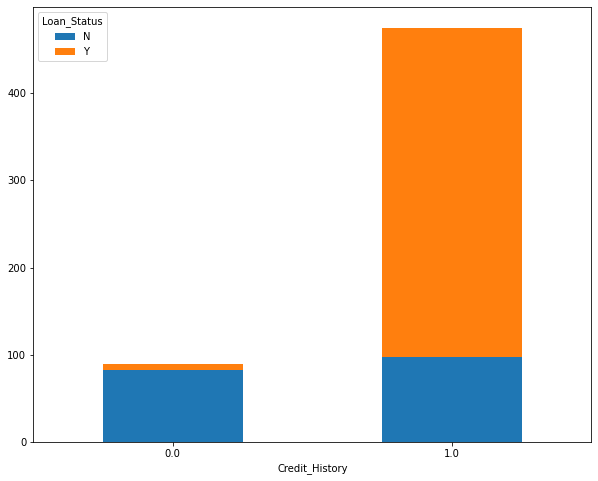

In [67]:
pd.crosstab(df["Credit_History"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

The chances of getting a loan are much higher if the applicant has a valid credit history. Plot similar graphs by `Married`, `Self-Employed`, `Property_Area`, etc.

In [68]:
pd.crosstab(df["Gender"], df['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


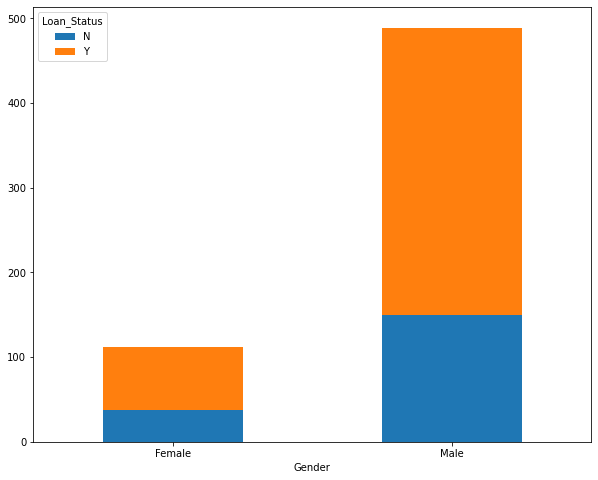

In [69]:
pd.crosstab(df["Gender"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

In [70]:
pd.crosstab(df["Married"], df['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


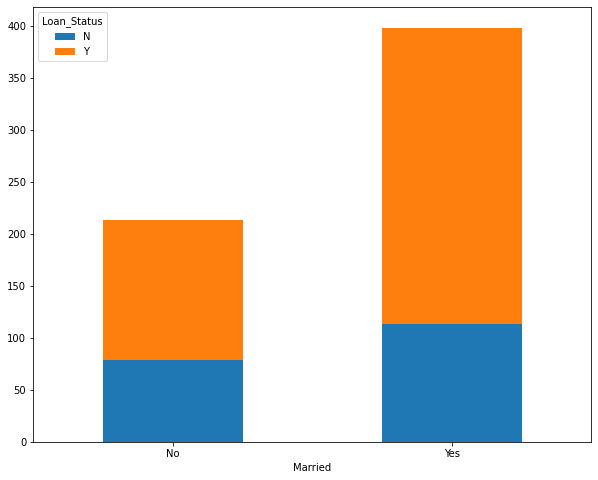

In [71]:
pd.crosstab(df["Married"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

In [72]:
pd.crosstab(df["Dependents"], df['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


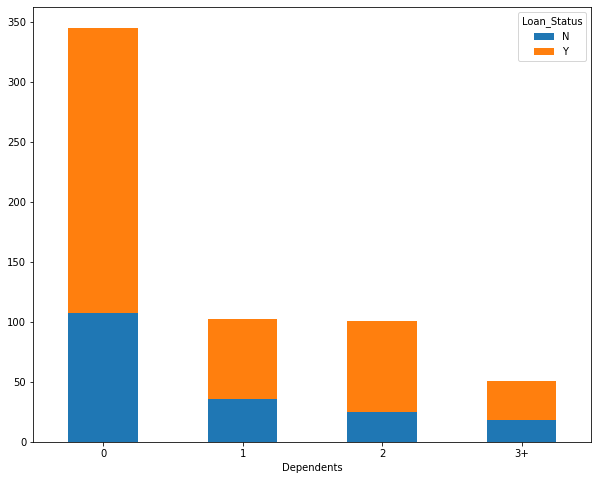

In [73]:
pd.crosstab(df["Dependents"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

In [74]:
pd.crosstab(df["Education"], df['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


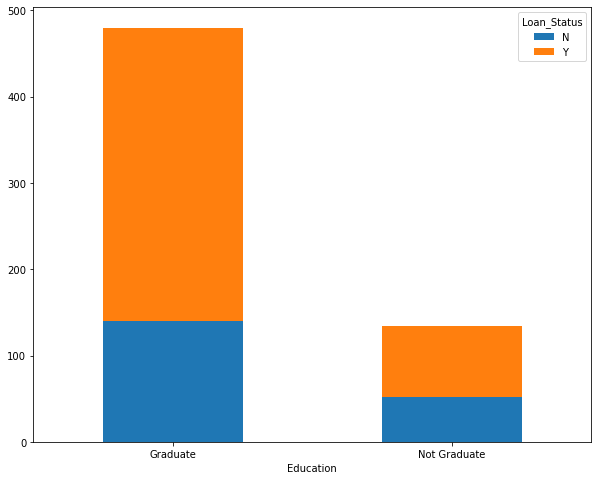

In [75]:
pd.crosstab(df["Education"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

In [76]:
pd.crosstab(df["Self_Employed"], df['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


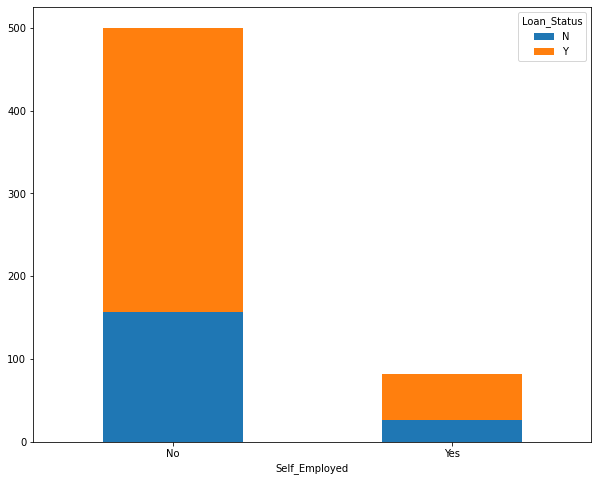

In [77]:
pd.crosstab(df["Self_Employed"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

In [78]:
pd.crosstab(df["Loan_Amount_Term"], df['Loan_Status'])

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,153,359


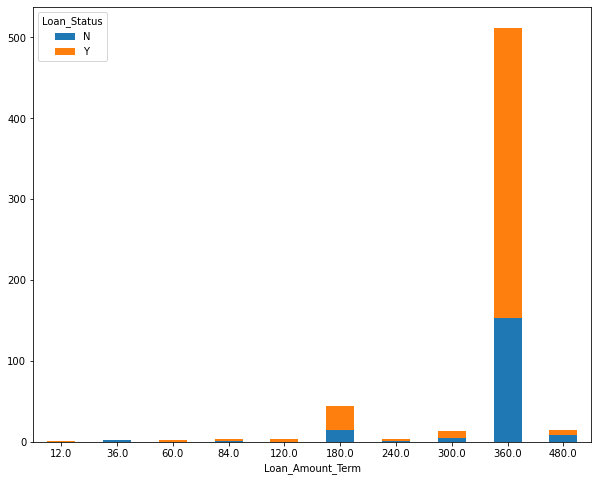

In [79]:
pd.crosstab(df["Loan_Amount_Term"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

In [80]:
pd.crosstab(df["Property_Area"], df['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


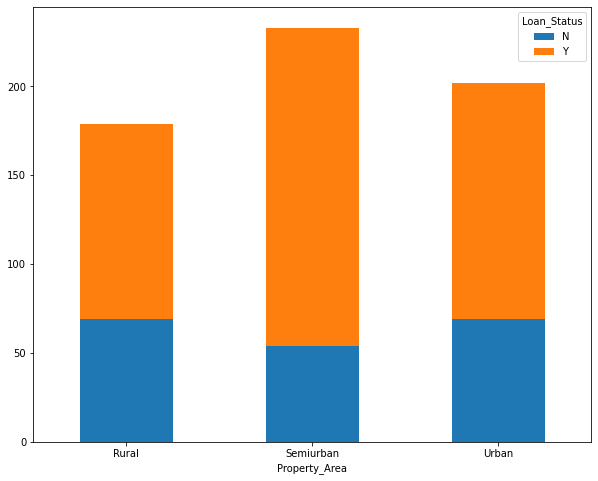

In [81]:
pd.crosstab(df["Property_Area"], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

From the stacked bar charts, it seems that none of the other 
categorical variables have much influence on Loan Status.

## 3. Variable Transformation

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [82]:
# extract the names of columns with missing values

cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
cols_with_missing

['Credit_History',
 'Self_Employed',
 'LoanAmount',
 'Dependents',
 'Loan_Amount_Term',
 'Gender',
 'Married']

In [83]:
# create new variable with the information that it was missing

for cl in cols_with_missing:
    df[cl + "_missing_ind"] = 0
    df.loc[df[cl].isnull(), cl + "_missing_ind"] = 1

In [84]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_missing_ind,Self_Employed_missing_ind,LoanAmount_missing_ind,Dependents_missing_ind,Loan_Amount_Term_missing_ind,Gender_missing_ind,Married_missing_ind
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,0,1,0,0,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0,0,0,0,0,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,0,0,0,0,0,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0,0,0,0,0,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0,0,0,0,0,0,0
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0,0,0,0,0,0,0
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,0,0,0,0,0,0,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,0,0,0,0,0,0,0
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,0,0,0,0,0,0,0


In [85]:
df.shape

(614, 19)

In [86]:
df.dtypes

Gender                           object
Married                          object
Dependents                       object
Education                        object
Self_Employed                    object
ApplicantIncome                   int64
CoapplicantIncome               float64
LoanAmount                      float64
Loan_Amount_Term                float64
Credit_History                  float64
Property_Area                    object
Loan_Status                      object
Credit_History_missing_ind        int64
Self_Employed_missing_ind         int64
LoanAmount_missing_ind            int64
Dependents_missing_ind            int64
Loan_Amount_Term_missing_ind      int64
Gender_missing_ind                int64
Married_missing_ind               int64
dtype: object

First, we will work with numeric variables with missing values.

We will start with LoanAmount first.

In [87]:
df[(df["LoanAmount_missing_ind"] > 0)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_missing_ind,Self_Employed_missing_ind,LoanAmount_missing_ind,Dependents_missing_ind,Loan_Amount_Term_missing_ind,Gender_missing_ind,Married_missing_ind
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,0,1,0,0,0,0
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y,0,0,1,0,0,0,0
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N,0,0,1,0,0,0,0
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y,0,0,1,0,0,0,0
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1,1,1,0,0,0,0
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,0,0,1,1,0,0,0
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y,0,0,1,0,0,0,0
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y,0,0,1,0,0,0,0
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y,0,0,1,0,0,0,0
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N,0,0,1,0,0,0,0


In [88]:
df.groupby('Education')["LoanAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,465.0,154.060215,92.883366,9.0,103.0,132.0,176.0,700.0
Not Graduate,127.0,118.409449,39.773636,25.0,96.5,115.0,133.0,279.0


In [89]:
df.groupby('Property_Area')["LoanAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
Property_Area,,,,,,,,
Rural,173.0,152.260116,80.233283,40.0,110.0,133.0,172.0,570.0
Semiurban,228.0,145.504386,81.668261,25.0,100.0,127.5,164.5,600.0
Urban,191.0,142.198953,94.547132,9.0,91.5,120.0,163.0,700.0


In [90]:
df.groupby(['Education', 'Property_Area'])["LoanAmount"].describe()

count        mean         std   min     25%  \
Education    Property_Area                                                
Graduate     Rural          127.0  163.023622   88.741685  40.0  115.00   
             Semiurban      182.0  152.587912   87.103739  25.0  104.00   
             Urban          156.0  148.480769  102.299464   9.0   90.00   
Not Graduate Rural           46.0  122.543478   36.403117  48.0  107.50   
             Semiurban       46.0  117.478261   46.067940  25.0   95.25   
             Urban           35.0  114.200000   35.456519  35.0   95.50   

                              50%    75%    max  
Education    Property_Area                       
Graduate     Rural          141.0  180.0  570.0  
             Semiurban      131.0  175.0  600.0  
             Urban          120.0  177.0  700.0  
Not Graduate Rural          120.0  138.0  218.0  
             Semiurban      110.5  130.0  279.0  
             Urban          120.0  136.0  186.0

We will fill the missing values by the median values per Education type.

In [91]:
median_LoanAmount_by_Education = df.groupby('Education')["LoanAmount"].median()
median_LoanAmount_by_Education

Education
Graduate        132.0
Not Graduate    115.0
Name: LoanAmount, dtype: float64

In [92]:
mask_grad = ((df['Education'] == 'Graduate') & (df["LoanAmount_missing_ind"] > 0))
mask_not_grad = ((df['Education'] == 'Not Graduate') & (df["LoanAmount_missing_ind"] > 0))

In [93]:
df.loc[mask_grad, "LoanAmount"] = median_LoanAmount_by_Education['Graduate']
df.loc[mask_not_grad, "LoanAmount"] = median_LoanAmount_by_Education['Not Graduate']


In [94]:
# Number of remaining null entries in LoanAmount column

df['LoanAmount'].isnull().sum()

0

In [95]:
# Now we will check how the means and medians of LoanAmount have changed.

df['LoanAmount'].describe()

count    614.000000
mean     145.701954
std       84.131689
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [96]:
df.groupby('Education')["LoanAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,480.0,153.370833,91.498177,9.0,104.0,132.0,175.00,700.0
Not Graduate,134.0,118.231343,38.720303,25.0,98.0,115.0,132.75,279.0


Now, we will work with Loan_Amount_Term.

In [97]:
df[(df["Loan_Amount_Term_missing_ind"] > 0)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_missing_ind,Self_Employed_missing_ind,LoanAmount_missing_ind,Dependents_missing_ind,Loan_Amount_Term_missing_ind,Gender_missing_ind,Married_missing_ind
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,0,1,0,0,1,0,0
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,0,0,0,0,1,0,0
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,0,0,0,0,1,0,0
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,0,0,0,0,1,0,0
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,0,0,0,0,1,0,0
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,0,0,0,0,1,0,0
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,0,0,0,0,1,0,0
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,0,0,0,0,1,0,0
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,0,0,0,0,1,0,0
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y,0,0,0,0,1,0,0


In [98]:
df.groupby('Education')["Loan_Amount_Term"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,472.0,344.669492,61.299661,12.0,360.0,360.0,360.0,480.0
Not Graduate,128.0,332.156250,77.079613,36.0,360.0,360.0,360.0,480.0


In [99]:
df.groupby('Property_Area')["Loan_Amount_Term"].describe()

,count,mean,std,min,25%,50%,75%,max
Property_Area,,,,,,,,
Rural,175.0,345.531429,54.420541,84.0,360.0,360.0,360.0,480.0
Semiurban,230.0,347.113043,60.504829,36.0,360.0,360.0,360.0,480.0
Urban,195.0,332.800000,77.386805,12.0,360.0,360.0,360.0,480.0


Since the median of Loan_Amount_Term per Education type or Property_Area is the
same as the median of Loan_Amount_Term, we fill the missing values by just the 
median of Loan_Amount_Term.


In [100]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(), inplace=True)

In [101]:
# Number of remaining null entries in Loan_Amount_Term column

df['Loan_Amount_Term'].isnull().sum()

0

In [102]:
# Now we will check how the means and medians of LoanAmount have changed.

df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

Now, we will work with the categorical variables with missing values.

Since we do not have enough information to fill in the missing values, we will 
create a new category called "Unknown" for the missing values in each column.

In [103]:
df.fillna('Unknown', inplace=True)

Check to see that there are no more missing values.

In [104]:
df.isnull().sum()

Gender                          0
Married                         0
Dependents                      0
Education                       0
Self_Employed                   0
ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                      0
Loan_Amount_Term                0
Credit_History                  0
Property_Area                   0
Loan_Status                     0
Credit_History_missing_ind      0
Self_Employed_missing_ind       0
LoanAmount_missing_ind          0
Dependents_missing_ind          0
Loan_Amount_Term_missing_ind    0
Gender_missing_ind              0
Married_missing_ind             0
dtype: int64

### Outliers
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after transformation

In [105]:
df["LoanAmount_log"] = df['LoanAmount'].apply(np.log)

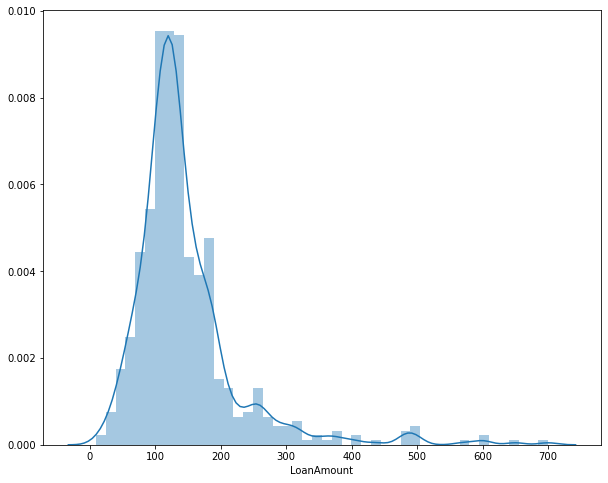

In [106]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['LoanAmount'])

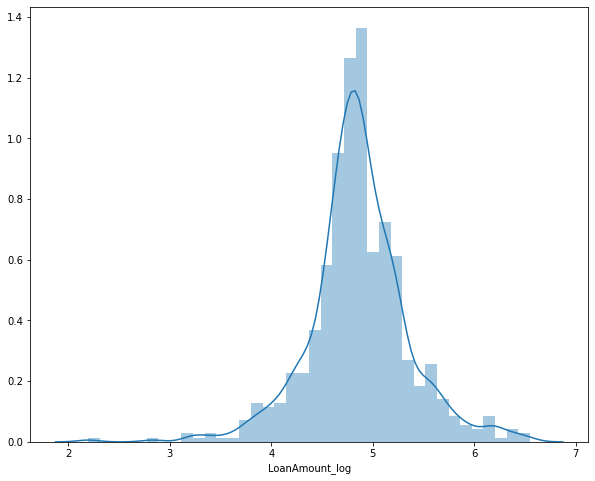

In [107]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['LoanAmount_log'])

In [108]:
df[['LoanAmount', 'LoanAmount_log']].describe()

,LoanAmount,LoanAmount_log
count,614.000000,614.000000
mean,145.701954,4.856781
std,84.131689,0.496156
min,9.000000,2.197225
25%,100.250000,4.607658
50%,128.000000,4.852030
75%,164.750000,5.104426
max,700.000000,6.551080


After applying a log transformation to LoanAmount, it seems that LoanAmount_log 
is now closer to a normal distribution than LoanAmount.

Combine both incomes as total income and take a log transformation of the same.

In [109]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [110]:
df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].describe()

,ApplicantIncome,CoapplicantIncome,Total_Income
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,7024.705081
std,6109.041673,2926.248369,6458.663872
min,150.000000,0.000000,1442.000000
25%,2877.500000,0.000000,4166.000000
50%,3812.500000,1188.500000,5416.500000
75%,5795.000000,2297.250000,7521.750000
max,81000.000000,41667.000000,81000.000000


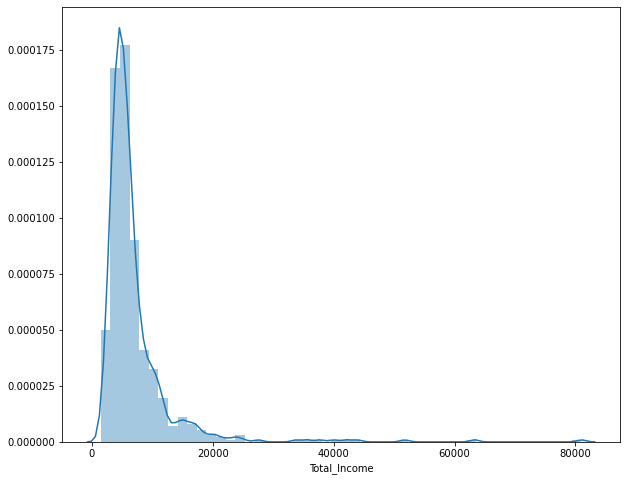

In [111]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['Total_Income'])

In [112]:
df["Total_Income_log"] = df['Total_Income'].apply(np.log)

In [113]:
df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'Total_Income_log']].describe()

,ApplicantIncome,CoapplicantIncome,Total_Income,Total_Income_log
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,7024.705081,8.669414
std,6109.041673,2926.248369,6458.663872,0.545102
min,150.000000,0.000000,1442.000000,7.273786
25%,2877.500000,0.000000,4166.000000,8.334712
50%,3812.500000,1188.500000,5416.500000,8.597205
75%,5795.000000,2297.250000,7521.750000,8.925549
max,81000.000000,41667.000000,81000.000000,11.302204


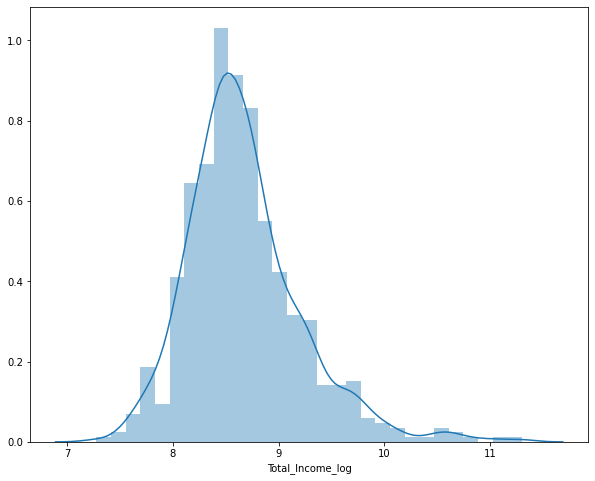

In [114]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(df['Total_Income_log'])

After applying a log transformation to Total_Income, it seems that LoanAmount_log 
is now closer to a normal distribution than Total_Income.

### Categorical Variables
Create dummy variables from categorical ones. If the variable is ordinal, we can simply map it to numbers.

In [115]:
df.shape

(614, 22)

In [116]:
df.dtypes

Gender                           object
Married                          object
Dependents                       object
Education                        object
Self_Employed                    object
ApplicantIncome                   int64
CoapplicantIncome               float64
LoanAmount                      float64
Loan_Amount_Term                float64
Credit_History                   object
Property_Area                    object
Loan_Status                      object
Credit_History_missing_ind        int64
Self_Employed_missing_ind         int64
LoanAmount_missing_ind            int64
Dependents_missing_ind            int64
Loan_Amount_Term_missing_ind      int64
Gender_missing_ind                int64
Married_missing_ind               int64
LoanAmount_log                  float64
Total_Income                    float64
Total_Income_log                float64
dtype: object

In [117]:
# lets map ORDINAL features

df.replace({'Dependents': {'Unknown': 0, '0': 1, '1': 2, '2': 3, '3+': 4},
            'Education': {'Not Graduate': 0, 'Graduate': 1}, 
            'Credit_History': {'Unknown': 0, 0: 1, 1: 2}, 
            'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 
            'Loan_Status': {'Y': 0, 'N': 1}}, 
           inplace=True)

Note that for 'Loan_Status', the 'Y' category is replaced by 0 
because it is the majority class.

In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Credit_History_missing_ind,Self_Employed_missing_ind,LoanAmount_missing_ind,Dependents_missing_ind,Loan_Amount_Term_missing_ind,Gender_missing_ind,Married_missing_ind,LoanAmount_log,Total_Income,Total_Income_log
0,Male,No,1,1,No,5849,0.0,132.0,360.0,2,...,0,0,1,0,0,0,0,4.882802,5849.0,8.674026
1,Male,Yes,2,1,No,4583,1508.0,128.0,360.0,2,...,0,0,0,0,0,0,0,4.852030,6091.0,8.714568
2,Male,Yes,1,1,Yes,3000,0.0,66.0,360.0,2,...,0,0,0,0,0,0,0,4.189655,3000.0,8.006368
3,Male,Yes,1,0,No,2583,2358.0,120.0,360.0,2,...,0,0,0,0,0,0,0,4.787492,4941.0,8.505323
4,Male,No,1,1,No,6000,0.0,141.0,360.0,2,...,0,0,0,0,0,0,0,4.948760,6000.0,8.699515


In [119]:
# Creating a copy of the dataframe to alter by one-hot encoding.

df2 = df.copy()

In [120]:
df2.shape

(614, 22)

In [121]:
df2.dtypes

Gender                           object
Married                          object
Dependents                        int64
Education                         int64
Self_Employed                    object
ApplicantIncome                   int64
CoapplicantIncome               float64
LoanAmount                      float64
Loan_Amount_Term                float64
Credit_History                    int64
Property_Area                     int64
Loan_Status                       int64
Credit_History_missing_ind        int64
Self_Employed_missing_ind         int64
LoanAmount_missing_ind            int64
Dependents_missing_ind            int64
Loan_Amount_Term_missing_ind      int64
Gender_missing_ind                int64
Married_missing_ind               int64
LoanAmount_log                  float64
Total_Income                    float64
Total_Income_log                float64
dtype: object

In [122]:
cat_feats2 = df2.dtypes[df2.dtypes == 'object'].index.tolist()
cat_feats2

['Gender', 'Married', 'Self_Employed']

Now, we will one-hot encode the categorical variables.

In [123]:
df2_dummy = pd.get_dummies(df2[cat_feats2])
df2_dummy.head()

,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,Married_Yes,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes
0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0
4,0,1,0,1,0,0,1,0,0


In [124]:
df2.drop(cat_feats2, axis=1, inplace=True)
df2.dtypes

Dependents                        int64
Education                         int64
ApplicantIncome                   int64
CoapplicantIncome               float64
LoanAmount                      float64
Loan_Amount_Term                float64
Credit_History                    int64
Property_Area                     int64
Loan_Status                       int64
Credit_History_missing_ind        int64
Self_Employed_missing_ind         int64
LoanAmount_missing_ind            int64
Dependents_missing_ind            int64
Loan_Amount_Term_missing_ind      int64
Gender_missing_ind                int64
Married_missing_ind               int64
LoanAmount_log                  float64
Total_Income                    float64
Total_Income_log                float64
dtype: object

In [125]:
print(df2.shape)
print(df2_dummy.shape)

(614, 19)
(614, 9)


In [126]:
df3 = pd.concat([df2, df2_dummy], axis=1)
df3.shape

(614, 28)

In [127]:
df3.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_missing_ind,...,Total_Income_log,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,Married_Yes,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes
0,1,1,5849,0.0,132.0,360.0,2,2,0,0,...,8.674026,0,1,0,1,0,0,1,0,0
1,2,1,4583,1508.0,128.0,360.0,2,0,1,0,...,8.714568,0,1,0,0,0,1,1,0,0
2,1,1,3000,0.0,66.0,360.0,2,2,0,0,...,8.006368,0,1,0,0,0,1,0,0,1
3,1,0,2583,2358.0,120.0,360.0,2,2,0,0,...,8.505323,0,1,0,0,0,1,1,0,0
4,1,1,6000,0.0,141.0,360.0,2,2,0,0,...,8.699515,0,1,0,1,0,0,1,0,0


In [128]:
cat_feats3 = df3.dtypes[df3.dtypes == 'object'].index.tolist()
cat_feats3

[]

All variables should now be numeric.

## Building a Predictive Model

In [129]:
# Identify the features X and target variable y.

y = df3["Loan_Status"]
X = df3.drop("Loan_Status", axis=1)

In [130]:
X.shape

(614, 27)

In [131]:
X.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Credit_History_missing_ind,Self_Employed_missing_ind,...,Total_Income_log,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,Married_Yes,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes
0,1,1,5849,0.0,132.0,360.0,2,2,0,0,...,8.674026,0,1,0,1,0,0,1,0,0
1,2,1,4583,1508.0,128.0,360.0,2,0,0,0,...,8.714568,0,1,0,0,0,1,1,0,0
2,1,1,3000,0.0,66.0,360.0,2,2,0,0,...,8.006368,0,1,0,0,0,1,0,0,1
3,1,0,2583,2358.0,120.0,360.0,2,2,0,0,...,8.505323,0,1,0,0,0,1,1,0,0
4,1,1,6000,0.0,141.0,360.0,2,2,0,0,...,8.699515,0,1,0,1,0,0,1,0,0


In [132]:
y.shape

(614,)

In [133]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

Split the dataset into 80% training set and 20% test set.

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2)
                                                    

In [136]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (491, 27)
Shape of X_test: (123, 27)
Shape of y_train: (491,)
Shape of y_test: (123,)


First, we will create a baseline model.

In [137]:
# For the baseline model, we will use the DummyRegressor model from sklearn.

from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [138]:
base = DummyClassifier()

In [139]:
base.fit(X_train, y_train)

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [140]:
y_pred_b = base.predict(X_train)

In [141]:
y_pred_b

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [142]:
print("Baseline Training Accuracy:",metrics.accuracy_score(y_train, y_pred_b))

Baseline Training Accuracy: 0.5641547861507128


In [143]:
print("Baseline Training Precision:",metrics.precision_score(y_train, y_pred_b))

Baseline Training Precision: 0.3132530120481928


In [144]:
print("Baseline Training Recall:",metrics.recall_score(y_train, y_pred_b))

Baseline Training Recall: 0.34210526315789475


In [145]:
print("Baseline Training AUC:",metrics.roc_auc_score(y_train, y_pred_b))

Baseline Training AUC: 0.5029110386585933


In [146]:
y_pred_b1 = base.predict(X_test)

In [147]:
y_pred_b1

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [148]:
print("Baseline Test Accuracy:",metrics.accuracy_score(y_test, y_pred_b1))

Baseline Test Accuracy: 0.5284552845528455


In [149]:
print("Baseline Test Precision:",metrics.precision_score(y_test, y_pred_b1))

Baseline Test Precision: 0.275


In [150]:
print("Baseline Test Recall:",metrics.recall_score(y_test, y_pred_b1))

Baseline Test Recall: 0.275


In [151]:
print("Baseline Test AUC:",metrics.roc_auc_score(y_test, y_pred_b1))

Baseline Test AUC: 0.46280120481927706


Make the first `LogisticRegression` model with `Credit_History` as the only feature.

In [152]:
# import the class
from sklearn.linear_model import LogisticRegression

In [153]:
# Note that X_train0 must be a 2D array.  
# The "to_frame()" is used here to turn Credit_History from a 1D array into a 2D array.

X_train0 = X_train["Credit_History"].to_frame()
X_train0.shape

(491, 1)

In [154]:
X_train0.head()

,Credit_History
548,1
103,2
570,2
569,1
476,2


In [155]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [156]:
# fit the model with data
logreg.fit(X_train0, y_train)

LogisticRegression()

In [157]:
y_pred = logreg.predict(X_train0)

In [158]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [159]:
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred))

Training Accuracy: 0.6456211812627292


In [160]:
print("Training Precision:",metrics.precision_score(y_train, y_pred))

Training Precision: 0.2608695652173913


In [161]:
print("Training Recall:",metrics.recall_score(y_train, y_pred))

Training Recall: 0.07894736842105263


In [162]:
print("Training AUC:",metrics.roc_auc_score(y_train, y_pred))

Training AUC: 0.4893261915851576


In [163]:
X_test0 = X_test["Credit_History"].to_frame()
X_test0.shape

(123, 1)

In [164]:
y_pred_1 = logreg.predict(X_test0)

In [165]:
y_pred_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [166]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Test Accuracy: 0.6585365853658537


In [167]:
print("Test Precision:",metrics.precision_score(y_test, y_pred_1))

Test Precision: 0.25


In [168]:
print("Test Recall:",metrics.recall_score(y_test, y_pred_1))

Test Recall: 0.025


In [169]:
print("Test AUC:",metrics.roc_auc_score(y_test, y_pred_1))

Test AUC: 0.49442771084337345


Try different combination of variables

We will try all the features.

In [170]:
# instantiate the model 
logreg1 = LogisticRegression(max_iter=200)

In [171]:
# fit the model with data
logreg1.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [172]:
logreg1.n_iter_

array([101], dtype=int32)

Note that we had to increase max_iter higher than 100 for the solver to converge.

In [173]:
y_pred1 = logreg1.predict(X_train)

In [174]:
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [175]:
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred1))

Training Accuracy: 0.6863543788187373


In [176]:
print("Training Precision:",metrics.precision_score(y_train, y_pred1))

Training Precision: 0.48333333333333334


In [177]:
print("Training Recall:",metrics.recall_score(y_train, y_pred1))

Training Recall: 0.19078947368421054


In [178]:
print("Training AUC:",metrics.roc_auc_score(y_train, y_pred1))

Training AUC: 0.5496720229777986


In [179]:
y_pred1_1 = logreg1.predict(X_test)

In [180]:
y_pred1_1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [181]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred1_1))

Test Accuracy: 0.6910569105691057


In [182]:
print("Test Precision:",metrics.precision_score(y_test, y_pred1_1))

Test Precision: 0.6666666666666666


In [183]:
print("Test Recall:",metrics.recall_score(y_test, y_pred1_1))

Test Recall: 0.1


In [184]:
print("Test AUC:",metrics.roc_auc_score(y_test, y_pred1_1))

Test AUC: 0.5379518072289158


The accuracy might went up on adding variables, what about other metrics?

For the training and test sets, the other metrics also improved 
when adding all the variables.  

For the training and test sets, Precision for the first Logistic 
Regression model was less than the baseline model but Precision for the second 
Logistic Regression model was greater than the baseline model.  For the 
training and test sets, Recall for both Logistic Regression models was less 
than the baseline model.  For the training set, AUC for the first 
Logistic Regression model was less than the baseline model but AUC for the 
second Logistic Regression model was greater than the baseline model.

Try `RandomForestClassifier` with default parameters

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
ranfor = RandomForestClassifier()

In [187]:
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In [188]:
y_pred2 = ranfor.predict(X_train)

In [189]:
y_pred2

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [190]:
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred2))

Training Accuracy: 1.0


In [191]:
print("Training Precision:",metrics.precision_score(y_train, y_pred2))

Training Precision: 1.0


In [192]:
print("Training Recall:",metrics.recall_score(y_train, y_pred2))

Training Recall: 1.0


In [193]:
print("Training AUC:",metrics.roc_auc_score(y_train, y_pred2))

Training AUC: 1.0


In [194]:
y_pred2_1= ranfor.predict(X_test)

In [195]:
y_pred2_1

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [196]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred2_1))

Test Accuracy: 0.8130081300813008


In [197]:
print("Test Precision:",metrics.precision_score(y_test, y_pred2_1))

Test Precision: 0.8695652173913043


In [198]:
print("Test Recall:",metrics.recall_score(y_test, y_pred2_1))

Test Recall: 0.5


In [199]:
print("Test AUC:",metrics.roc_auc_score(y_test, y_pred2_1))

Test AUC: 0.7319277108433735


In [200]:
# To find the maximum depth.

depths = [a.get_depth() for a in ranfor.estimators_]
max_dep = max(depths)
max_dep

24

Try `grid search` to improve the results

We may use Randomized Search instead of Grid Search.

In [201]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [202]:
model = RandomForestClassifier()

In [203]:
param_grid = {'max_depth': randint((max_dep - 2), max_dep), 
              'n_estimators': randint(200, 250)}

In [204]:
rand_search = RandomizedSearchCV(model, param_grid, cv=10, n_jobs=-1)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9269267880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9267b9f7c0>})

In [205]:
rand_search.best_params_

{'max_depth': 23, 'n_estimators': 239}

In [206]:
rand_search.best_score_

0.7840816326530613

In [207]:
y_pred_gs= rand_search.predict(X_train)

In [208]:
y_pred_gs

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [209]:
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_gs))

Training Accuracy: 1.0


In [210]:
print("Training Precision:",metrics.precision_score(y_train, y_pred_gs))

Training Precision: 1.0


In [211]:
print("Training Recall:",metrics.recall_score(y_train, y_pred_gs))

Training Recall: 1.0


In [212]:
print("Training AUC:",metrics.roc_auc_score(y_train, y_pred_gs))

Training AUC: 1.0


In [213]:
y_pred_gs_1= rand_search.predict(X_test)

In [214]:
y_pred_gs_1

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [215]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_gs_1))

Test Accuracy: 0.8211382113821138


In [216]:
print("Test Precision:",metrics.precision_score(y_test, y_pred_gs_1))

Test Precision: 0.8461538461538461


In [217]:
print("Test Recall:",metrics.recall_score(y_test, y_pred_gs_1))

Test Recall: 0.55


In [218]:
print("Test AUC:",metrics.roc_auc_score(y_test, y_pred_gs_1))

Test AUC: 0.7509036144578313


Note that every metric but Precision improved.